In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
# passos para se abrir um excel no pandas

excel= 'AÇÕES.xlsx'
aba= 'CARTEIRA'

# passando excel para df
df= pd.read_excel(excel, sheet_name=aba)


c:\Users\dulor\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\dulor\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [19]:
df=df.iloc[:44] #excluindo linhas

excluir_columns= ['Unnamed: 0','FIIs','MODELO','VALORIZAÇÃO EM %','VALORIZAÇÃO','COMPRA / VENDA']
df= df.drop(excluir_columns, axis=1)

df['TICKER']= df['TICKER'].str.replace('*', '') # tirando * 

In [20]:
df['TOTAL AÇÕES']= df['TOTAL AÇÕES'].astype(int) # formatando para interio
df['PREÇO MÉDIO']= df['PREÇO MÉDIO'].round(2) # formatando para só ter duas casa decimas depois da virgula
df['VALOR PATRIMONIAL'] = pd.to_numeric(df['VALOR PATRIMONIAL'], errors='coerce')# aqui estou convertendo a coluna inteira para valores numericos pq estava dando erro
df['VALOR PATRIMONIAL']= df['VALOR PATRIMONIAL'].round(2) # formatando

In [21]:
df.head(5)

,SEGMENTO,TICKER,TOTAL AÇÕES,PREÇO MÉDIO,VALOR PATRIMONIAL,PREÇO DE MERCADO,VALOR PATRIMONIAL ATUAL,DIVIDENDOS
0,AGRO,ABEV3.SA,200,17.35,3470.00,13.71,2742,391.31
1,AGRO,CAML3.SA,20,8.86,177.30,8.21,164.2,25.52
2,AGRO,MDIA3.SA,27,26.88,725.80,38,1026,47.30
3,AGRO,MRFG3.SA,150,12.09,1813.14,9.81,1471.5,256.53
4,AGRO,SMTO3.SA,7,27.26,190.79,29.23,204.61,15.49


In [22]:
# Calcular Valor Investido Total
df['VALOR INVESTIDO'] = df['TOTAL AÇÕES'] * df['PREÇO MÉDIO']
valor_investido_total = df['VALOR INVESTIDO'].sum()

# Calcular Valor Total Atual
df['VALOR TOTAL ATUAL'] = df['TOTAL AÇÕES'] * df['PREÇO DE MERCADO']
valor_total_atual = df['VALOR TOTAL ATUAL'].sum()

# Calcular Variação
variacao = valor_total_atual - valor_investido_total
variacao_percentual = (variacao / valor_investido_total) * 100

# Exibir resultados
print(f'Valor Investido Total: R${valor_investido_total:.2f}')
print(f'Valor Total Atual: R${valor_total_atual:.2f}')
print(f'Variação: R${variacao:.2f} ({variacao_percentual:.2f}%)')

Valor Investido Total: R$50967.09
Valor Total Atual: R$43644.61
Variação: R$-7322.48 (-14.37%)


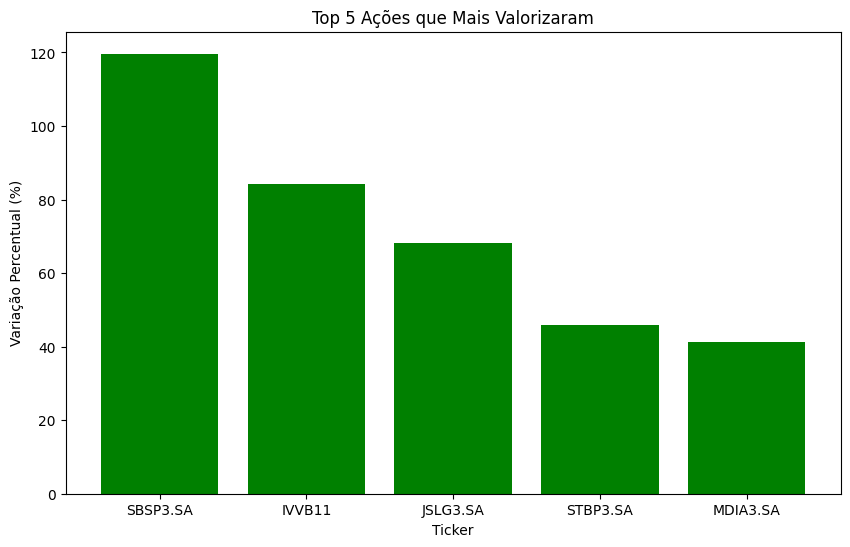

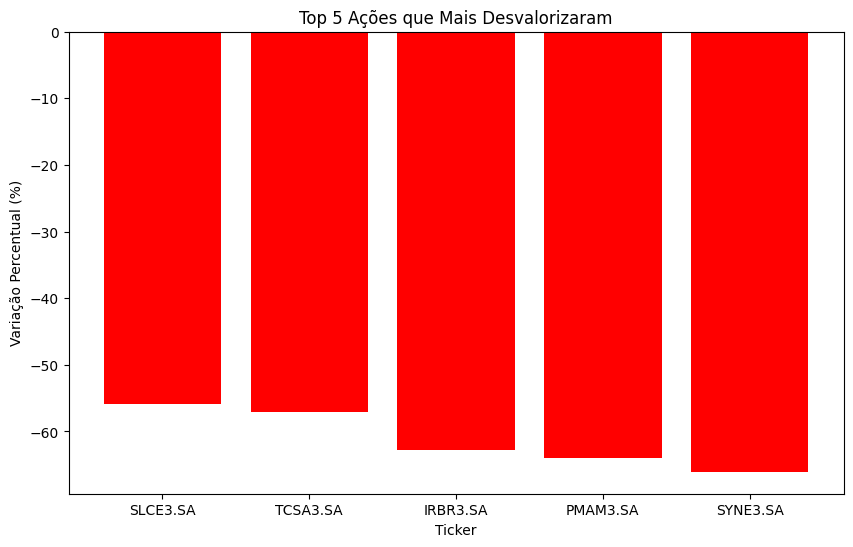

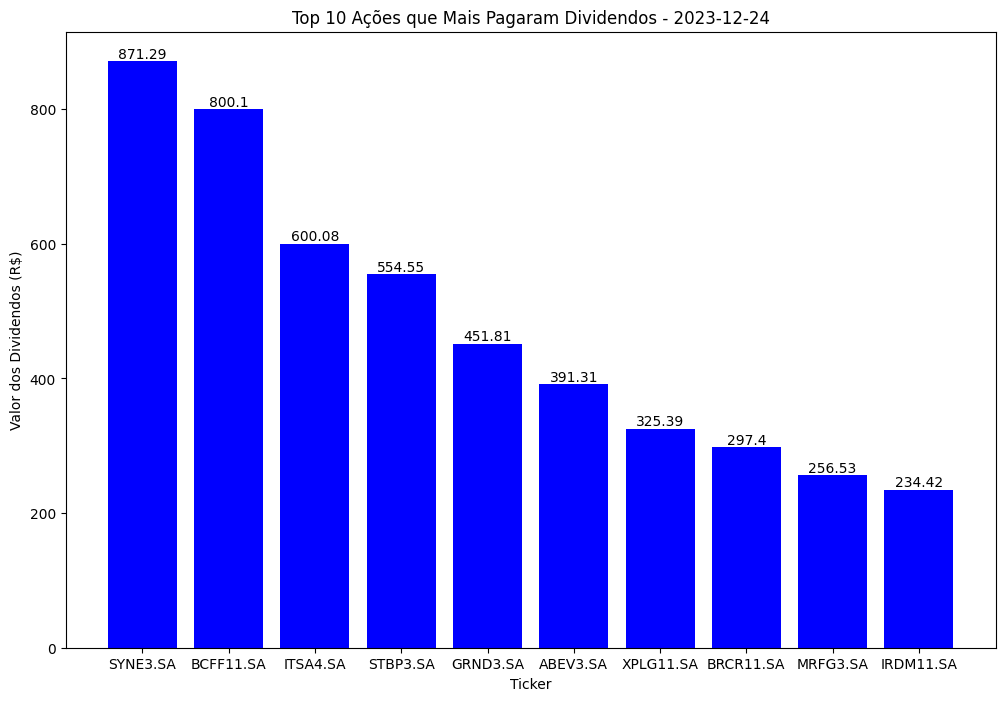

In [23]:
# Calcular a variação percentual
df['VARIAÇÃO %'] = ((df['PREÇO DE MERCADO'] - df['PREÇO MÉDIO']) / df['PREÇO MÉDIO']) * 100

# Ordenar o DataFrame por variação percentual
df = df.sort_values(by='VARIAÇÃO %', ascending=False)

# Plotar as 5 ações que mais valorizaram
plt.figure(figsize=(10, 6))
plt.bar(df['TICKER'].head(5), df['VARIAÇÃO %'].head(5), color='green')
plt.title('Top 5 Ações que Mais Valorizaram')
plt.xlabel('Ticker')
plt.ylabel('Variação Percentual (%)')
plt.show()

# Plotar as 5 ações que mais desvalorizaram
plt.figure(figsize=(10, 6))
plt.bar(df['TICKER'].tail(5), df['VARIAÇÃO %'].tail(5), color='red')
plt.title('Top 5 Ações que Mais Desvalorizaram')
plt.xlabel('Ticker')
plt.ylabel('Variação Percentual (%)')
plt.show()

# Selecionar as 10 ações que mais pagaram dividendos
top_10_dividendos = df.nlargest(10, 'DIVIDENDOS')

# Plotar gráfico de barras para as 10 ações com mais dividendos
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_dividendos['TICKER'], top_10_dividendos['DIVIDENDOS'], color='blue')

# Adicionar o valor acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adicionar a data de hoje ao título do gráfico
data_hoje = datetime.today().strftime('%Y-%m-%d')

plt.title(f'Top 10 Ações que Mais Pagaram Dividendos - {data_hoje}')
plt.xlabel('Ticker')
plt.ylabel('Valor dos Dividendos (R$)')
plt.show()